In [ ]:
# Алгоритм классификации AdaBoost на решающих деревьях

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


def get_grid(data):
    x_min, x_max = data[:, 0].min() - 10, data[:, 0].max() + 10
    y_min, y_max = data[:, 1].min() - 10, data[:, 1].max() + 10
    return np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))


t = [[(85, 174), (93, 156), (103, 176), (113, 152), (123, 133), (128, 160), (147, 127), (152, 137), (180, 124), (180, 148), (205, 133), (207, 113), (199, 158), (222, 168), (235, 137), (237, 152), (265, 149), (258, 180), (237, 196), (255, 214), (270, 203), (280, 186), (280, 228), (269, 239), (300, 203), (289, 240), (279, 270), (294, 271), (308, 238), (118, 187), (154, 154)], [(157, 226), (180, 205), (179, 238), (196, 225), (171, 256), (201, 255), (184, 288), (218, 254), (215, 293), (233, 282), (217, 330), (226, 316), (241, 314), (253, 337), (267, 314), (278, 335), (286, 349), (290, 314), (309, 345), (328, 347), (329, 314), (314, 322), (342, 286), (356, 314), (360, 332), (368, 286), (376, 307), (387, 273), (384, 248), (395, 289), (377, 263), (389, 213), (409, 224), (409, 258), (376, 202), (380, 169), (408, 186), (408, 205), (424, 164), (406, 149), (436, 197), (427, 242), (419, 273), (402, 313), (380, 335)]]
n1 = len(t[0])
n2 = len(t[1])

train_data = np.r_[t[0], t[1]]
train_labels = np.r_[np.ones(n1) * -1, np.ones(n2)]

# x, y = train_data[:, 0], train_data[:, 1]
# plt.scatter(x[train_labels == -1], y[train_labels == -1])
# plt.scatter(x[train_labels == 1], y[train_labels == 1])
# plt.show()

XN = len(train_data)    # длина обучающей выборки
T = 1                   # число алгоритмов в композиции
max_depth = 2           # максимальная глубина решающих деревьев
w = np.ones(XN) / XN    # начальные значения весов для объектов выборки
algs = []               # список из полученных алгоритмов
alfa = []               # список из вычисленных весов для композиции

for n in range(T):
    # создаем и обучаем решающее дерево с весами объектов w
    algs.append(DecisionTreeClassifier(criterion='gini', max_depth=max_depth))
    algs[n].fit(train_data, train_labels, sample_weight=w)

    predicted = algs[n].predict(train_data) # формируем прогнозы полученного дерева по обучающей выборке
    N = np.sum(np.abs(train_labels - predicted) / 2 * w)   # вычисляем долю неверных классификаций
    alfa.append( 0.5 * np.log((1 - N) / N) if N != 0 else np.log((1-1e-8) / 1e-8) ) # вычисляем вес для текущего алгоритма

    # пересчитываем веса объектов выборки
    w = w * np.exp(-1 * alfa[n] * train_labels * predicted)
    w = w / np.sum(w)


# вычисляем число ошибок классификации на основе полученной композиции
predicted = alfa[0] * algs[0].predict(train_data)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(train_data)

N = np.sum(np.abs(train_labels - np.sign(predicted)) / 2)
print(f"Число ошибок на обучающей выборке: {N} при композиции {T} решающих деревьев")


# отображаем полученные результаты классификации
xx, yy = get_grid(train_data)
predicted = alfa[0] * algs[0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='spring', shading='auto')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=5000 * w, cmap='spring', edgecolors='black', linewidth=1.5)
plt.show()

In [1]:
import pandas as pd
from pathlib import Path
shift = Path('../..')
encoding = 'windows-1252'
df = pd.read_csv(shift/Path('csic_database.csv'), encoding=encoding)

In [2]:
df.head(5)

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [2]:
import re
# from typing_extensions import List
from pathlib import Path
from tqdm import tqdm


SHIFT = Path('../..')
TRAIN_DATA_PATH = "normalTrafficTraining.txt"
TEST_DATA_NORMAL_PATH =  "normalTrafficTest.txt"
TEST_DATA_ANOMALY_PATH =  "anomalousTrafficTest.txt"
SPLIT_REQUEST =  r'\n\n(?=GET|POST)'
encoding = 'windows-1252'

def read_file(file_path: Path) -> str:
    if not file_path.exists():
        raise FileExistsError(str(file_path))
    
    with file_path.open('r', encoding=encoding) as file:
        return file.read()

def starts_with_method(line: str, method: str = 'GET') -> bool:
    return line.startswith(method)

def parse(path: Path, request_reg: str = SPLIT_REQUEST, shift: Path = SHIFT, method: str = 'GET'): #-> List[str]:
    request_readed_from_txt = read_file(shift / path)
    requests = re.split(request_reg, request_readed_from_txt)
    needed_requests = []
    for index, request in tqdm(enumerate(requests), total=len(requests)):
        if starts_with_method(request):
            needed_requests.append(request)
    return needed_requests

request_TRAIN_DATA = parse(TRAIN_DATA_PATH)
request_TEST_DATA_NORMAL = parse(TEST_DATA_NORMAL_PATH)
request_TEST_DATA_ANOMALY = parse(TEST_DATA_ANOMALY_PATH)


100%|██████████| 24668/24668 [00:00<00:00, 913889.55it/s]


In [3]:
print(len(request_TRAIN_DATA), len(request_TEST_DATA_NORMAL), len(request_TEST_DATA_ANOMALY))

28000 28000 15088


In [4]:
print(request_TRAIN_DATA[0])

GET http://localhost:8080/tienda1/index.jsp HTTP/1.1
User-Agent: Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)
Pragma: no-cache
Cache-control: no-cache
Accept: text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5
Accept-Encoding: x-gzip, x-deflate, gzip, deflate
Accept-Charset: utf-8, utf-8;q=0.5, *;q=0.5
Accept-Language: en
Host: localhost:8080
Cookie: JSESSIONID=1F767F17239C9B670A39E9B10C3825F4
Connection: close



In [9]:
from pprint import pprint
token_pattern='(?u)\\b\\w\\w+\\b'
tokens = re.findall(token_pattern, request_TRAIN_DATA[0])

# pprint(tokens)
unique_tokens = set(tokens)
print(len(tokens), len(unique_tokens))
pprint(unique_tokens)

59 44
{'1F767F17239C9B670A39E9B10C3825F4',
 '8080',
 'Accept',
 'Agent',
 'Cache',
 'Charset',
 'Connection',
 'Cookie',
 'Encoding',
 'GET',
 'Gecko',
 'HTTP',
 'Host',
 'JSESSIONID',
 'KHTML',
 'Konqueror',
 'Language',
 'Linux',
 'Mozilla',
 'Pragma',
 'User',
 'application',
 'cache',
 'close',
 'compatible',
 'control',
 'deflate',
 'en',
 'gzip',
 'html',
 'http',
 'image',
 'index',
 'jsp',
 'like',
 'localhost',
 'no',
 'plain',
 'png',
 'text',
 'tienda1',
 'utf',
 'xhtml',
 'xml'}


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer

wp_tokenizer = WordPunctTokenizer()
def tokenize(text):
    return wp_tokenizer.tokenize(text)
vectorizer = TfidfVectorizer(encoding=encoding, strip_accents='unicode', tokenizer=tokenize)


In [19]:
vectorizer.fit([request_TRAIN_DATA[0]])
tokens = vectorizer.get_feature_names_out()
print(len(tokens), tokens)

63 ['(' ')' '*;' '+' ',' ',*/*;' '-' '.' '/' '0' '1'
 '1f767f17239c9b670a39e9b10c3825f4' '3' '5' '8' '8080' '9' ':' '://' ';'
 '=' 'accept' 'agent' 'application' 'cache' 'charset' 'close' 'compatible'
 'connection' 'control' 'cookie' 'deflate' 'en' 'encoding' 'gecko' 'get'
 'gzip' 'host' 'html' 'http' 'image' 'index' 'jsessionid' 'jsp' 'khtml'
 'konqueror' 'language' 'like' 'linux' 'localhost' 'mozilla' 'no' 'plain'
 'png' 'pragma' 'q' 'text' 'tienda1' 'user' 'utf' 'x' 'xhtml' 'xml']


In [41]:
vectorizer = TfidfVectorizer(encoding=encoding, strip_accents='unicode', tokenizer=tokenize, \
    max_features=2000, max_df = 0.7, min_df = 0.0001)
X_TRAIN_DATA = vectorizer.fit_transform(request_TRAIN_DATA)
tokens = vectorizer.get_feature_names_out()
print(len(tokens))

2000


In [42]:
X_TEST_DATA_ANOMALY = vectorizer.transform(request_TEST_DATA_ANOMALY)
X_TEST_DATA_NORMAL = vectorizer.transform(request_TEST_DATA_NORMAL)


In [58]:
print(X_TRAIN_DATA.shape, X_TEST_DATA_ANOMALY.shape, X_TEST_DATA_NORMAL.shape)

(28000, 2000) (15088, 2000) (28000, 2000)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from random import random
from sklearn.utils import shuffle

X_TRAIN = np.concatenate((X_TRAIN_DATA.toarray(), X_TEST_DATA_ANOMALY.toarray()))
Y_TRAIN = np.concatenate((np.ones(X_TRAIN_DATA.shape[0]), -np.ones(X_TEST_DATA_ANOMALY.shape[0])))
# X_TRAIN, Y_TRAIN = shuffle(X_TRAIN, Y_TRAIN, random_state=0)

In [64]:
print(X_TRAIN.shape, Y_TRAIN.shape, sep='\n')

(43088, 2000)
(43088,)


In [110]:
from tqdm import trange
from sklearn.ensemble import RandomForestClassifier
train_data = X_TRAIN
train_labels = Y_TRAIN

XN = len(train_data)    # длина обучающей выборки
T = 15                   # число алгоритмов в композиции
max_depth = 15           # максимальная глубина решающих деревьев
w = np.ones(XN) / XN    # начальные значения весов для объектов выборки
algs = []               # список из полученных алгоритмов
alfa = []               # список из вычисленных весов для композиции

with trange(T) as iterT:
    for n in iterT:
        # создаем и обучаем решающее дерево с весами объектов w
        algs.append(RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=max_depth, random_state=2024, n_jobs=-1))
        algs[n].fit(train_data, train_labels, sample_weight=w)

        predicted = algs[n].predict(train_data) # формируем прогнозы полученного дерева по обучающей выборке
        N = np.sum(np.abs(train_labels - predicted) / 2 * w)   # вычисляем долю неверных классификаций
        alfa.append( 0.5 * np.log((1 - N) / N) if N != 0 else np.log((1-1e-8) / 1e-8) ) # вычисляем вес для текущего алгоритма

        # пересчитываем веса объектов выборки
        w = w * np.exp(-1 * alfa[n] * train_labels * predicted)
        w = w / np.sum(w)
        
        # вычисляем число ошибок классификации на основе полученной композиции
        predicted = alfa[0] * algs[0].predict(train_data)
        for kn in range(1, n):
            predicted += alfa[kn] * algs[kn].predict(train_data)

        N = np.sum(np.abs(train_labels - np.sign(predicted)) / 2)
        iterT.set_postfix(err_rate = N)
        

# вычисляем число ошибок классификации на основе полученной композиции
predicted = alfa[0] * algs[0].predict(train_data)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(train_data)

N = np.sum(np.abs(train_labels - np.sign(predicted)) / 2)
print(f"Число ошибок на обучающей выборке: {N} при композиции {T} решающих деревьев")


# train_labels

100%|██████████| 15/15 [02:53<00:00, 11.57s/it, err_rate=1019.0]


Число ошибок на обучающей выборке: 1013.0 при композиции 15 решающих деревьев


In [111]:
print(do_predict(train_data, train_labels))
test_data = X_TEST_DATA_NORMAL.toarray()
test_labels = np.ones(test_data.shape[0])
print(do_predict(test_data, test_labels))

0.976489974006684
0.9630714285714286


100%|██████████| 1/1 [00:17<00:00, 17.64s/it]
Число ошибок на обучающей выборке: 7227.0 при композиции 1 решающих деревьев

100%|██████████| 6/6 [01:44<00:00, 17.34s/it]
Число ошибок на обучающей выборке: 2714.0 при композиции 6 решающих деревьев

100%|██████████| 25/25 [09:36<00:00, 23.06s/it]
Число ошибок на обучающей выборке: 2376.0 при композиции 25 решающих деревьев

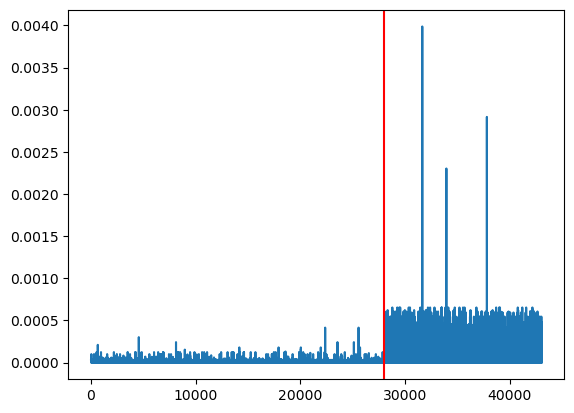

In [112]:
plt.plot(w)
plt.axvline(x=X_TRAIN_DATA.shape[0], c='r')

In [120]:
w[:, None].shape

(43088, 1)

In [130]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    w[:, None], train_labels, test_size=0.33, random_state=42, stratify=train_labels)
log_reg = SGDClassifier(random_state=2024)
sc = StandardScaler()
poly = PolynomialFeatures(4)
X_train = sc.fit_transform(poly.fit_transform(X_train))
log_reg.fit(X_train, y_train)
print(accuracy_score(log_reg.predict(X_train), y_train), accuracy_score(log_reg.predict(sc.transform(poly.transform(X_test))), y_test), sep='\n')

0.8258971871968962
0.8256680731364275


In [94]:
from sklearn.metrics import accuracy_score

test_data = X_TEST_DATA_NORMAL.toarray()
test_labels = np.ones(test_data.shape[0])
def do_predict(test_data, test_labels):
    predicted = alfa[0] * algs[0].predict(test_data)
    for n in range(1, T):
        predicted += alfa[n] * algs[n].predict(test_data)
    return accuracy_score(test_labels, np.sign(predicted))
print(do_predict(test_data, test_labels))
print(do_predict(train_data, train_labels))

0.9520714285714286
0.9448570367619755


In [93]:

print(accuracy_score(train_labels, np.sign(predicted)))
print(accuracy_score(test_labels, np.sign(predicted)))

0.9520714285714286


In [90]:
print(X_TEST_DATA_NORMAL.shape,)

(28000, 2000)

In [ ]:
# Dubble 2

X_TRAIN = X_TRAIN_DATA.toarray()
Y_TRAIN = np.ones(X_TRAIN_DATA.shape[0])
# X_TRAIN, Y_TRAIN = shuffle(X_TRAIN, Y_TRAIN, random_state=0)

In [106]:
import pandas as pd
ind = X_TRAIN_DATA.shape[0]
pd.DataFrame(data=w[:ind]).describe()

,0
count,2.800000e+04
mean,1.848177e-05
std,1.708608e-05
min,4.587607e-07
25%,1.494060e-05
50%,2.011999e-05
75%,2.048694e-05
max,6.354350e-04


In [107]:
pd.DataFrame(data=w[ind:]).describe()

,0
count,1.508800e+04
mean,3.197974e-05
std,1.045110e-04
min,4.587607e-07
25%,4.587607e-07
50%,1.239189e-06
75%,7.472057e-06
max,2.161944e-03


In [75]:
import seaborn as sns
diff = pd.DataFrame(data={'data':w,'target':train_labels})

In [81]:
diff.head()

,data,target
0,0.000016,1.0
1,0.000023,1.0
2,0.000060,1.0
3,0.000005,1.0
4,0.000012,1.0


In [82]:
diff.target.value_counts()

 1.0    28000
-1.0    15088
Name: target, dtype: int64

In [77]:
diff.shape

(43088, 2)

In [108]:
NORMAL_W = w[:ind]
ANOMALEUS_W = w[ind:]
print(np.percentile(NORMAL_W, 90), np.percentile(NORMAL_W, 95))

2.491966368196159e-05 3.384814347029427e-05


In [109]:
print(np.percentile(ANOMALEUS_W, 90), f'{np.percentile(ANOMALEUS_W, 95):e}')

3.4816635344782576e-05 4.219528e-04


In [88]:
print(np.percentile(ANOMALEUS_W, 15), np.percentile(ANOMALEUS_W, 25))

1.117698606401416e-06 1.8390980877941462e-06
